In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def showCatsBy(by,xlabel=''): #views
  if xlabel == '': xlabel = by 
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= xlabel +' por Categoría', ylabel="Categoría", xlabel=xlabel)

In [4]:
def correct_outliers_cats(col, q_min=0.025, q_max=0.95):
  outliers = data_cat.groupby('snippet.title').agg(
      out_min = (col, lambda x : x.quantile(q_min)),
      out_max = (col, lambda x : x.quantile(q_max))
    )
  outliers.reset_index(inplace=True)
  display(outliers)
  

  for index, row in outliers.iterrows():
    cat, omin, omax = row

    nCat = len(data_cat[data_cat['snippet.title'] == cat])
    nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
    nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])
    print( f"{cat} por {col}".upper() )
    print( f'Frecuencia: {nCat} \t f. outliers min: {nCatOutMin} \t f. outliers max: {nCatOutMax}' )

    #corrigiendo outliers máximos
    if (nCatOutMax > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>omax), col ] = [omax]*nCatOutMax
    #corrigiendo outliers mínimos
    if (nCatOutMin > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]<omin), col ] = [omin]*nCatOutMin
    

## 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Movies y Music, siendo la categoría de Movies la que puede alcanzar puntos muy diferenciados de tendencia.

### Corrigiendo outliers de likes por categoría

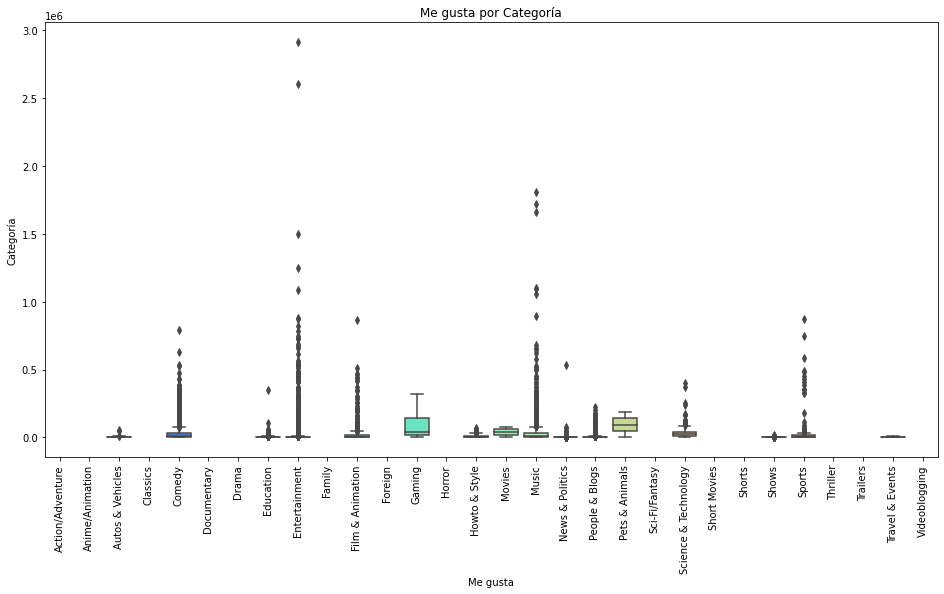

In [5]:
showCatsBy('likes','Me gusta')

In [6]:
correct_outliers_cats('likes', q_min=0.025, q_max=0.95)

,snippet.title,out_min,out_max
0,Action/Adventure,NaN,NaN
1,Anime/Animation,NaN,NaN
2,Autos & Vehicles,68.475,23375.25
3,Classics,NaN,NaN
4,Comedy,706.775,169444.80
5,Documentary,NaN,NaN
6,Drama,NaN,NaN
7,Education,0.000,17165.60
8,Entertainment,44.000,33113.00
9,Family,NaN,NaN


ACTION/ADVENTURE POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
ANIME/ANIMATION POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
AUTOS & VEHICLES POR LIKES
Frecuencia: 34 	 f. outliers min: 1 	 f. outliers max: 2
CLASSICS POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
COMEDY POR LIKES
Frecuencia: 1152 	 f. outliers min: 29 	 f. outliers max: 58
DOCUMENTARY POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
DRAMA POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
EDUCATION POR LIKES
Frecuencia: 813 	 f. outliers min: 0 	 f. outliers max: 41
ENTERTAINMENT POR LIKES
Frecuencia: 7781 	 f. outliers min: 192 	 f. outliers max: 389
FAMILY POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
FILM & ANIMATION POR LIKES
Frecuencia: 539 	 f. outliers min: 14 	 f. outliers max: 27
FOREIGN POR LIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
GAMING POR LIKES
Frecuencia: 22 	 f. outliers mi

C:\Users\GART-03\AppData\Local\Temp\ipykernel_13624\3351928774.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_13624\3351928774.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])


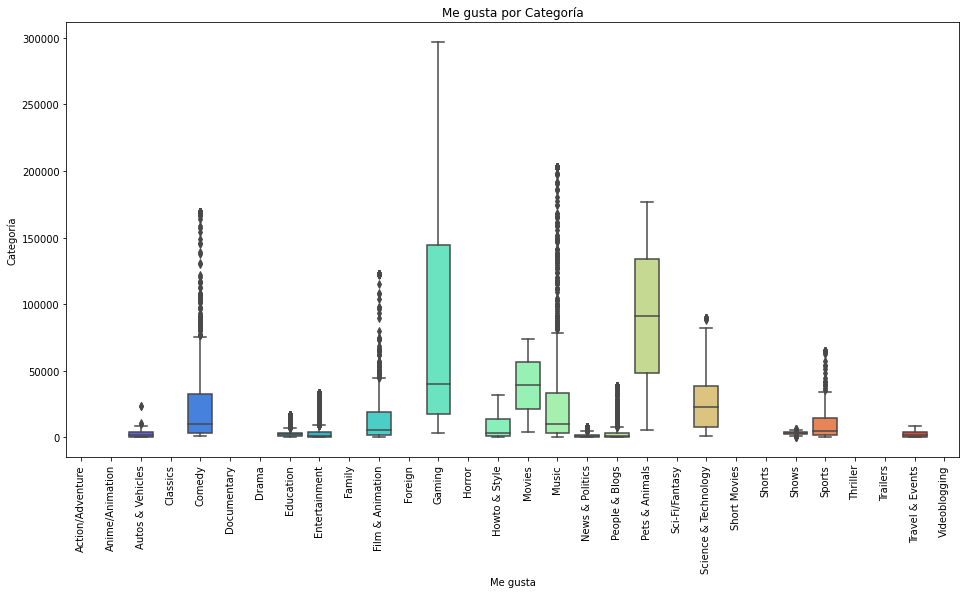

In [7]:
showCatsBy('likes','Me gusta')

### Análisis

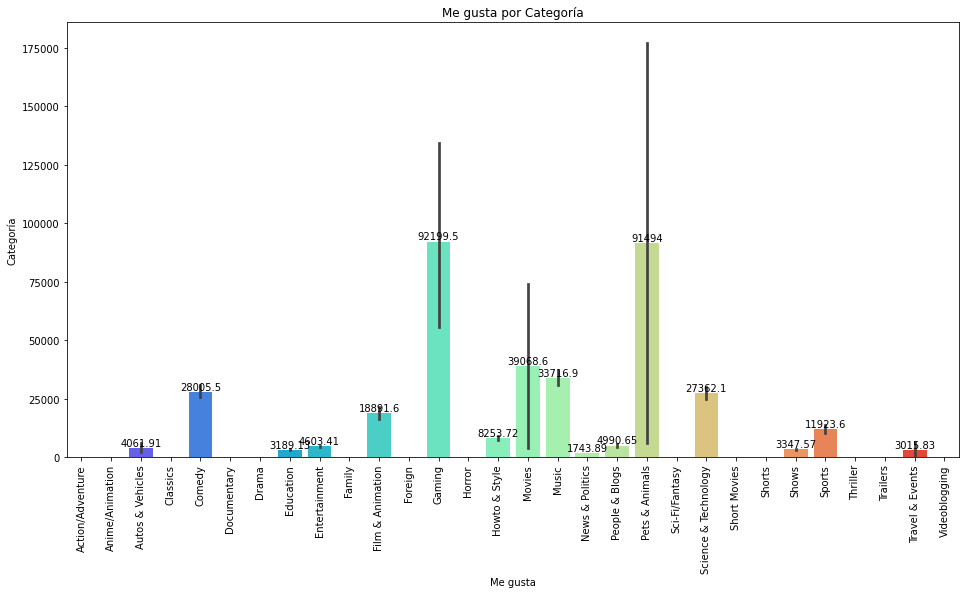

In [8]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
cat_likes_plot = sns.barplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow')
cat_likes_plot.set(title='Me gusta por Categoría', ylabel="Categoría", xlabel='Me gusta')
for i in cat_likes_plot.containers: cat_likes_plot.bar_label(i,)

Las categorías con mayor cantidad consistente de likes son Pets & Animals y Gaming. Sin embargo, las categorías Music, Entertainment y Sports pueden llegar a conseguir cantidades muy grandes de "me gusta"s, aunque ello sucede con poca frecuencia.

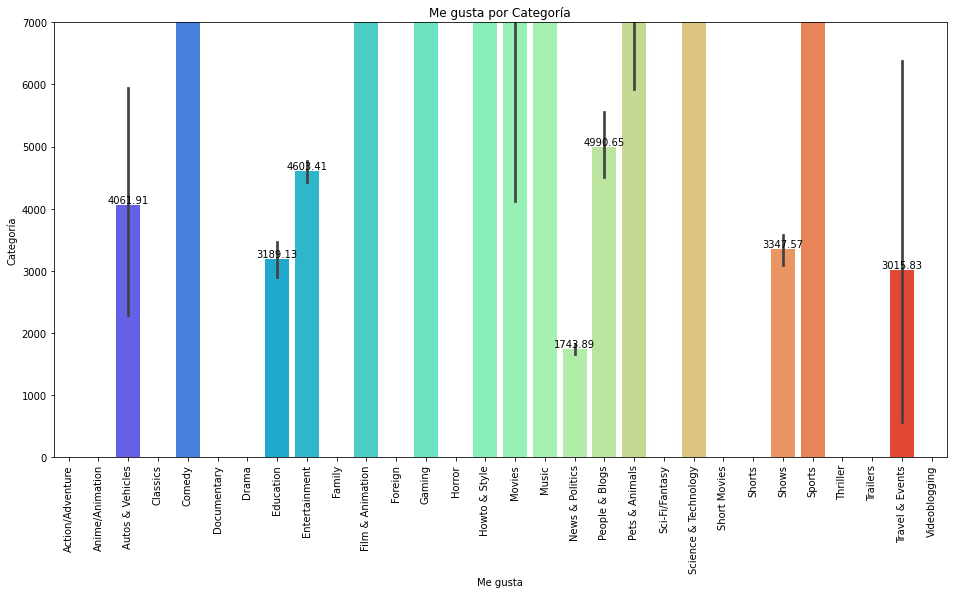

In [9]:
#plot.ylim([0, 7000])
cat_likes_plot.set(ylim=(0, 7000))
cat_likes_plot.figure

Las categorías con menor cantidad de "me gusta", sin considerar aquellas categorías con nula cantidad de estos, son News & Politics, Travels & Events, Education, Shows, Autos & Vehicles, Entertainment y People & Blogs. Las categorías con nula cantidad de likes son Action/Adventure, Anime/Animation, Classics, Documentary, Drama, Family, Foreign, Horror, Sci-Fi/Fantasy, Short Movies, Shorts, Thriller, Trailers y Videoblogging.

In [10]:
cat_likes_plot.set(ylim=(0, 180000))

[(0.0, 180000.0)]

In [11]:
cat_likes_plot.figure.savefig("../graphs/likes_category.png")

In [12]:
%store data_cat
%store cat_likes_plot

Stored 'data_cat' (DataFrame)
Stored 'cat_likes_plot' (AxesSubplot)
